# The energetic conditions of ridge propagation
If a ridge is to propagate, then the work available to drive propagation must necessarily exceed the work dissipated by the existing transform, $\phi$.

Also necessary, the strain energy released by the growth of one ridge axis must be greater than the energy absorbed by the dying ridge. Within a fracture mechanics framework, this is equivalent to a stress intensity factor driving the growing ridge, $K_d$, exceeding the stress intensity factor resisting the growth, $K_r$.

In [7]:
from subprocess import call
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def compute_transform_energy(age_offset,rate,flags={}):
    outfile = open('out.temp','w')
    runcmd = 'transform_energy' + ' ' + str(age_offset) + ' ' + str(rate) + ' '
    for flag, val in flags.items():
        runcmd = runcmd + str(flag) + ' ' + str(val) + ' '
    print(runcmd)
    call(runcmd,shell=True,stdout=outfile)
    total_work = np.loadtxt('out.temp')
    return total_work

## Estimating the work done at a transform zone
We can estimate the work done at a transform, $\phi$, as the integral of $2\tau U$ over the transform zone, where $U$ is the half spreading rate and $\tau$ is the yield stress. We use a yield strength envelope with a realistic thermal model to estimate the work done at the transform. We need to consider that for a typical transform fault, the transform zone is significantly damaged and the yield stress is lower than that of the lithosphere generally. So, we need to keep in mind that this is likely an overestimate. However, since we're concerned not with well-developed transform faults but with the broader zones of deformation, the estimate might not be so bad.

We will estimate the work done for a given spreading rate while varying the length of the transform offset or the age difference at the offset.

In [24]:
# start with a nominal spreading rate of 20 mm/yr half rate
rate = 0.02
offsets = [0.1,0.3,0.5,1.0,1.5,2.0,2.5,3.0]
n = len(offsets)
phi = np.zeros((n,1))
    

In [25]:
i = 0
for offset in offsets:
    phi[i] = compute_transform_energy(offset,rate)
    i += 1

transform_energy 0.1 0.02 
transform_energy 0.3 0.02 
transform_energy 0.5 0.02 
transform_energy 1.0 0.02 
transform_energy 1.5 0.02 
transform_energy 2.0 0.02 
transform_energy 2.5 0.02 
transform_energy 3.0 0.02 


Text(0, 0.5, 'Work (W)')

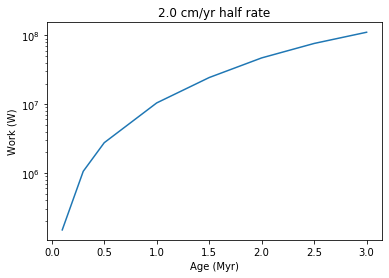

In [30]:
fig_a, axes = plt.subplots()
axes.semilogy(offsets,phi)
axes.set_title(str(rate*100) + ' cm/yr half rate')
axes.set_xlabel('Age (Myr)')
axes.set_ylabel('Work (W)')


### An analytical solution
We might compare our results to an analytical solution to verify/qualify our approach. An analytical solution to can be found in Phipps Morgan and Parmentier (1985)

In [2]:
A = 10000
B = 10000
g = 9.8
rho = 2900
L = 30000
U = 0.02